<a href="https://colab.research.google.com/github/NewtonSawitta/BasicProg_DataViz65/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW3

วาดกราฟ parallel coordinate เปรียบเทียบ [ราคา และ พื้นที่ใช้สอย] ของบ้านและคอนโดในจังหวัดเชียงใหม่

# Import Data

In [121]:
import pandas as pd

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ข้อมูลที่อยู่อาศัยราย Unit

In [123]:
unit = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_unittype.csv')
unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...


### ข้อมูลที่อยู่อาศัยรายโครงการ (Project)

In [124]:
project = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_project.csv')
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


- **ต่อตาราง**



In [125]:
project_nodup = project.drop_duplicates(subset=['project_id'])

In [126]:
unit['province'] = unit['project_id'].map(project_nodup.set_index('project_id')['province_name_en'])
unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...,Bangkok
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...,Chiang Mai
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,Chiang Mai
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...,Nonthaburi
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...,Samut Prakan


In [127]:
DataCM = unit[unit['province']=='Chiang Mai']
DataCM

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.00,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...,Chiang Mai
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,Chiang Mai
19,37807,unittype_1641,project_843,บ้านเชิงดอย,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:36:48,2020-10-14 00:39:42,baania,https://baania.com/th/project/บ้านเชิงดอย-843/...,Chiang Mai
21,10064,unittype_1888,project_36,House Type & Plan 1,1,Detached House,บ้าน,NaN,300.00,7500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:19,2020-11-02 16:46:41,baania,https://baania.com/th/project/ลานนาซิตี้ปาร์ค-...,Chiang Mai
25,17337,5f2d048d306e7e0019068fad,5f2cdf27306e7e0019068f25,โฮมออฟฟิศสามชั้น,6,Home office,โฮมออฟฟิศ,NaN,210.00,6300000.0,...,NaN,1.0,NaN,NaN,NaN,2021-11-12 13:18:59,2020-08-07 14:38:19,baania,https://baania.com/th/project/นิวเอจ-สตูดิโอเฮ...,Chiang Mai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,4020,unittype_3435,project_1160,Suite Room,2,Condo,คอนโด,NaN,53.18,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 10:00:08,2022-01-14 09:51:57,baania,https://baania.com/th/project/บีทู-เมาน์เทน-พา...,Chiang Mai
42568,36846,unittype_37618,project_16502,1 Bedroom,2,Condo,คอนโด,NaN,74.00,5500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:28:49,baania,https://baania.com/th/project/ปันนา-เรสซิเดนซ์...,Chiang Mai
42577,34184,unittype_3893,project_1220,1 Bedroom,2,Condo,คอนโด,NaN,32.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:27,2020-10-14 00:55:04,baania,https://baania.com/th/project/เดอะ-เกรส-คอนโดม...,Chiang Mai
42602,39384,unittype_3476,project_812,2 Bedroom Type A,2,Condo,คอนโด,NaN,94.00,6345000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 11:00:11,2022-01-14 10:32:44,baania,https://baania.com/th/project/เดอะ-ยูนีค-คอนโด...,Chiang Mai


In [128]:
DataCM_UP = DataCM[(DataCM['propertytype_name_en']=='Condo') | (DataCM['propertytype_name_en']=='Detached House')]
DataCM_UP.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,Chiang Mai
19,37807,unittype_1641,project_843,บ้านเชิงดอย,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:36:48,2020-10-14 00:39:42,baania,https://baania.com/th/project/บ้านเชิงดอย-843/...,Chiang Mai
21,10064,unittype_1888,project_36,House Type & Plan 1,1,Detached House,บ้าน,NaN,300.0,7500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:19,2020-11-02 16:46:41,baania,https://baania.com/th/project/ลานนาซิตี้ปาร์ค-...,Chiang Mai
29,21066,unittype_3494,project_901,Type O (ขายแล้ว),2,Condo,คอนโด,NaN,62.0,NaN,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:23:16,2020-10-14 20:42:31,baania,https://baania.com/th/project/พีค-การ์เด้น-คอน...,Chiang Mai
33,20434,unittype_3043,project_409,Type J,2,Condo,คอนโด,NaN,49.0,NaN,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:23:09,2020-10-14 20:35:20,baania,https://baania.com/th/project/โมด้าคอนโด-409/t...,Chiang Mai


- **Parallel Coordinates**

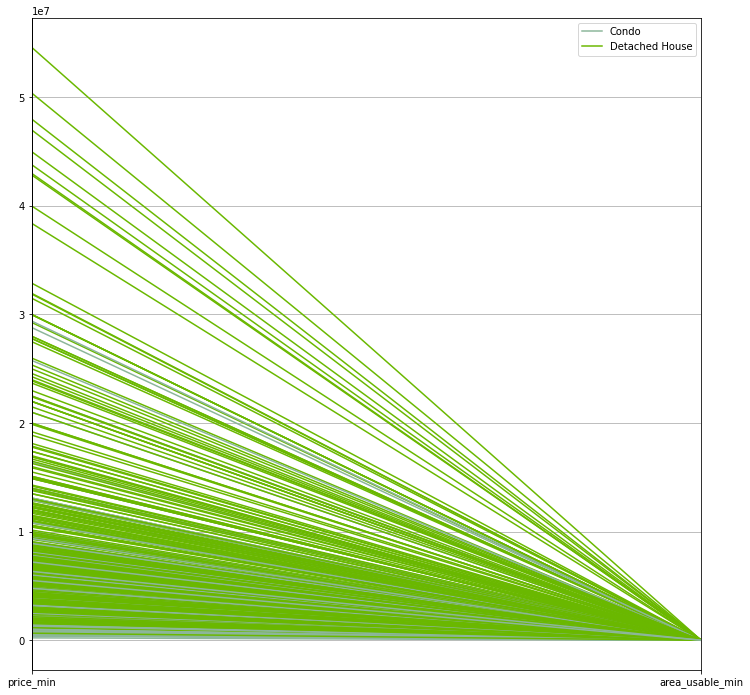

In [129]:
pd.plotting.parallel_coordinates(DataCM_UP, 'propertytype_name_en', cols = ['price_min','area_usable_min'])

# เฉลย

## ต่อตาราง

In [130]:
project_nodup = project.drop_duplicates(subset=['project_id'])

unit['province'] = unit['project_id'].map(project_nodup.set_index('project_id')['province_name_th'])
unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...,กรุงเทพมหานคร
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...,เชียงใหม่
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,เชียงใหม่
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...,นนทบุรี
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...,สมุทรปราการ


In [131]:
unit_cm = unit[unit['province']=='เชียงใหม่']
unit_cm

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.00,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...,เชียงใหม่
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,เชียงใหม่
19,37807,unittype_1641,project_843,บ้านเชิงดอย,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:36:48,2020-10-14 00:39:42,baania,https://baania.com/th/project/บ้านเชิงดอย-843/...,เชียงใหม่
21,10064,unittype_1888,project_36,House Type & Plan 1,1,Detached House,บ้าน,NaN,300.00,7500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:19,2020-11-02 16:46:41,baania,https://baania.com/th/project/ลานนาซิตี้ปาร์ค-...,เชียงใหม่
25,17337,5f2d048d306e7e0019068fad,5f2cdf27306e7e0019068f25,โฮมออฟฟิศสามชั้น,6,Home office,โฮมออฟฟิศ,NaN,210.00,6300000.0,...,NaN,1.0,NaN,NaN,NaN,2021-11-12 13:18:59,2020-08-07 14:38:19,baania,https://baania.com/th/project/นิวเอจ-สตูดิโอเฮ...,เชียงใหม่
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,4020,unittype_3435,project_1160,Suite Room,2,Condo,คอนโด,NaN,53.18,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 10:00:08,2022-01-14 09:51:57,baania,https://baania.com/th/project/บีทู-เมาน์เทน-พา...,เชียงใหม่
42568,36846,unittype_37618,project_16502,1 Bedroom,2,Condo,คอนโด,NaN,74.00,5500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:28:49,baania,https://baania.com/th/project/ปันนา-เรสซิเดนซ์...,เชียงใหม่
42577,34184,unittype_3893,project_1220,1 Bedroom,2,Condo,คอนโด,NaN,32.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:27,2020-10-14 00:55:04,baania,https://baania.com/th/project/เดอะ-เกรส-คอนโดม...,เชียงใหม่
42602,39384,unittype_3476,project_812,2 Bedroom Type A,2,Condo,คอนโด,NaN,94.00,6345000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 11:00:11,2022-01-14 10:32:44,baania,https://baania.com/th/project/เดอะ-ยูนีค-คอนโด...,เชียงใหม่


In [132]:
unit_cm_hcd = unit_cm[(unit_cm['propertytype_name_en']=='Condo') | (unit_cm['propertytype_name_en']=='Detached House')]
unit_cm_hcd.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,province
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...,เชียงใหม่
19,37807,unittype_1641,project_843,บ้านเชิงดอย,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:36:48,2020-10-14 00:39:42,baania,https://baania.com/th/project/บ้านเชิงดอย-843/...,เชียงใหม่
21,10064,unittype_1888,project_36,House Type & Plan 1,1,Detached House,บ้าน,NaN,300.0,7500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:19,2020-11-02 16:46:41,baania,https://baania.com/th/project/ลานนาซิตี้ปาร์ค-...,เชียงใหม่
29,21066,unittype_3494,project_901,Type O (ขายแล้ว),2,Condo,คอนโด,NaN,62.0,NaN,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:23:16,2020-10-14 20:42:31,baania,https://baania.com/th/project/พีค-การ์เด้น-คอน...,เชียงใหม่
33,20434,unittype_3043,project_409,Type J,2,Condo,คอนโด,NaN,49.0,NaN,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:23:09,2020-10-14 20:35:20,baania,https://baania.com/th/project/โมด้าคอนโด-409/t...,เชียงใหม่


In [133]:
unit_cm_hcd = unit_cm_hcd.dropna(subset=['price_min','area_usable_min'])

In [134]:
unit_cm_hcd['area_usable_min'] = unit_cm_hcd['area_usable_min'].apply(lambda x: x*100000)

In [135]:
from matplotlib import pyplot as plt
import matplotlib

In [136]:
matplotlib.rcParams['figure.figsize']=[12,12]

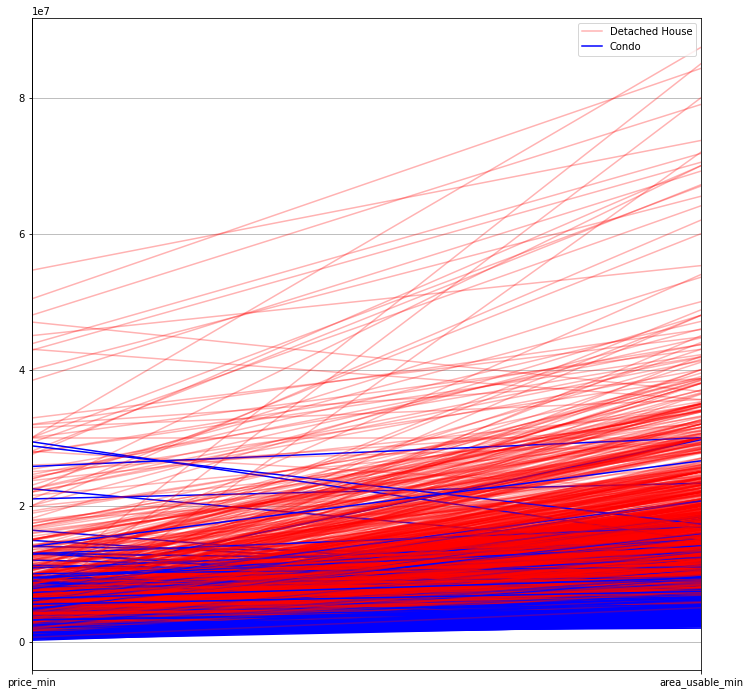

In [137]:
pd.plotting.parallel_coordinates(unit_cm_hcd, 'propertytype_name_en', cols = ['price_min','area_usable_min'],color=[[1,0,0,0.3],[0,0,1,1]])